In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Import Data
def import_data(filename:str):
    data = [[], [], [], []]
    with open(filename, 'r') as f:
        headlines = f.readline()
        for i in f:
            item = list(map(float, i.strip().split()[2:6]))
            for j in range(len(item)):
                data[j].append(item[j])
    return np.array(data, dtype=np.float32)

ch = import_data('data.txt')

n = len(ch[0])
I0 = 1.055e-3
A1 = 3.90802e-3
B1 = -5.80195e-7
C1 = -4.27350e-12
R0 = 100

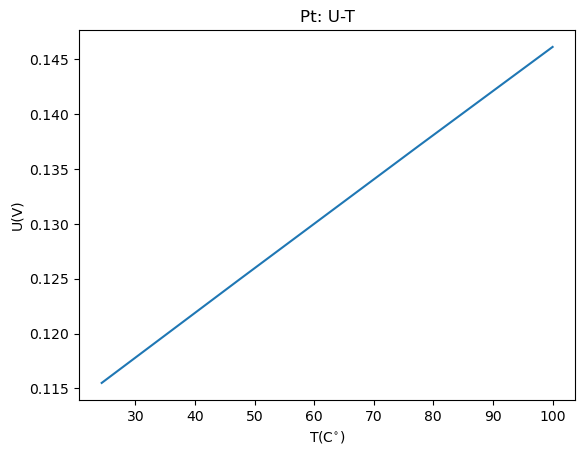

In [37]:
T = (-A1+np.sqrt(A1**2-4*B1*(1-ch[0]/I0/R0)))/(2*B1)
plt.title(r'Pt: U-T')
plt.plot(T, ch[0])
plt.xlabel(r'T(C$^{\circ}$)')
plt.ylabel(r'U(V)')
plt.show()

R0: 2564.816157729745 B: 3974.0434808598816
PearsonRResult(statistic=0.9999643511821188, pvalue=0.0)


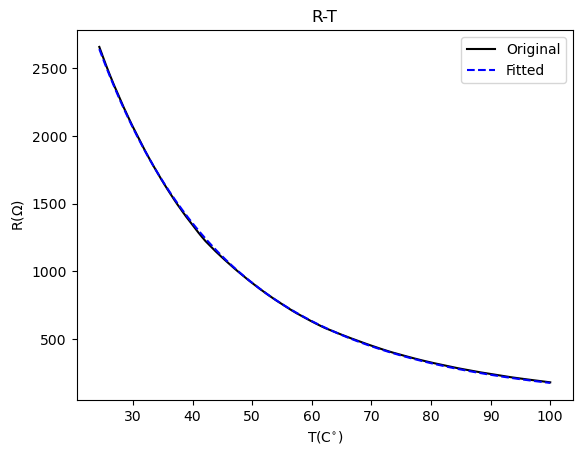

In [38]:
from scipy.optimize import leastsq
from scipy.stats import pearsonr
import math
def K(T):
    return T+273.15

def func1(x, p):
    R0, B = p
    return R0*np.exp(B*(K(x)**(-1)-K(25)**(-1)))

def resit1(p, y, x):
    return y-func1(x, p)

p01 = (2575, 4000)
res1 = leastsq(resit1, p01, args=(ch[1], T))
r1 = pearsonr(np.log(ch[1]), K(T)**-1)
print('R0:', res1[0][0], 'B:', res1[0][1])
print(r1)
plt.title(r'R-T')
plt.plot(T, ch[1], 'k-', label='Original')
plt.plot(T, func1(T, res1[0]), 'b--', label='Fitted')
plt.legend()
plt.xlabel(r'T(C$^{\circ}$)')
plt.ylabel(r'R($\Omega$)')
plt.show()

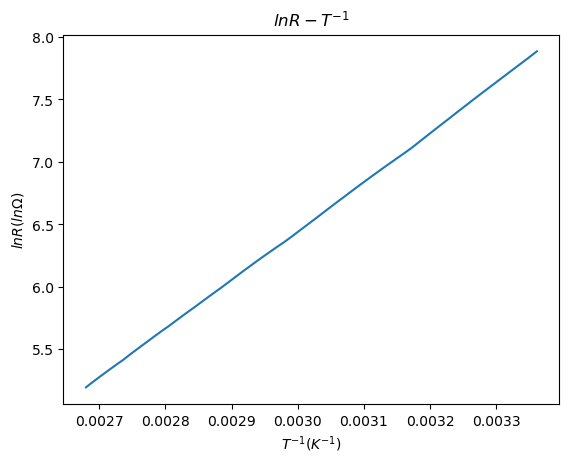

In [39]:
plt.title(r'$lnR - T^{-1}$')
plt.plot(K(T)**-1, np.log(ch[1]))
plt.xlabel(r'$T^{-1}(K^{-1})$')
plt.ylabel(r'$lnR(ln \Omega)$')
plt.show()

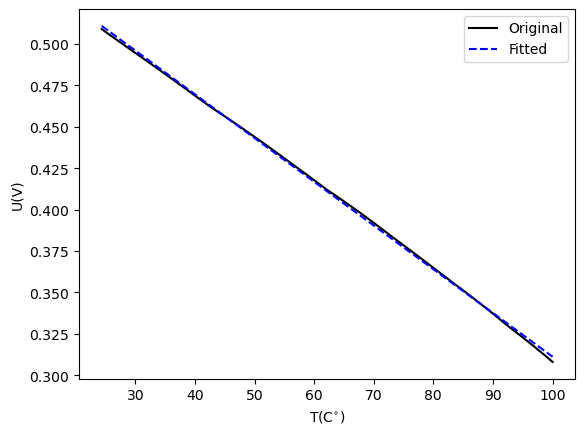

[-9.21643558e-20  2.01192393e+09]
PearsonRResult(statistic=-0.999771106689599, pvalue=0.0)


In [40]:
q = 1.6022e-19
k = 1.3807e-23/q
If = 100e-6

def func2(x, p):
    Eg, B = p
    return -Eg/q+k*np.log(If/B)*x

def resit2(p, y, x):
    return y-func2(x, p)

p02 = (5.6e-1, 4e-21)
res2 = leastsq(resit2, p02, args=(ch[2], T), maxfev=10**7)
r2 = pearsonr(ch[2], K(T))

plt.plot(T, ch[2], 'k-', label='Original')
plt.plot(T, func2(T, res2[0]), 'b--', label='Fitted')
plt.legend()
plt.xlabel(r'T(C$^{\circ}$)')
plt.ylabel(r'U(V)')
plt.show()
print(res2[0])
print(r2)


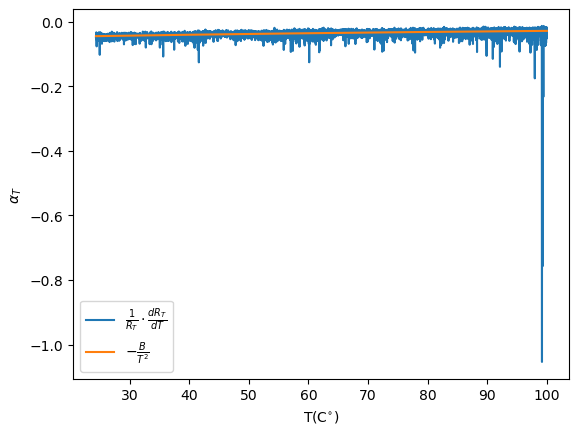

In [41]:
def alpha(y, x):
    return np.diff(y)/np.diff(x)/y[:-1]

plt.plot(T[:-1], alpha(ch[1], K(T)), label=r'$\frac{1}{R_T}\cdot\frac{dR_T}{dT}$')
plt.plot(T[:-1], -res1[0][1]/(K(T[:-1])**2), label=r'$-\frac{B}{T^2}$')
plt.xlabel(r'T(C$^{\circ}$)')
plt.ylabel(r'$\alpha_T$')
plt.legend()
plt.show()

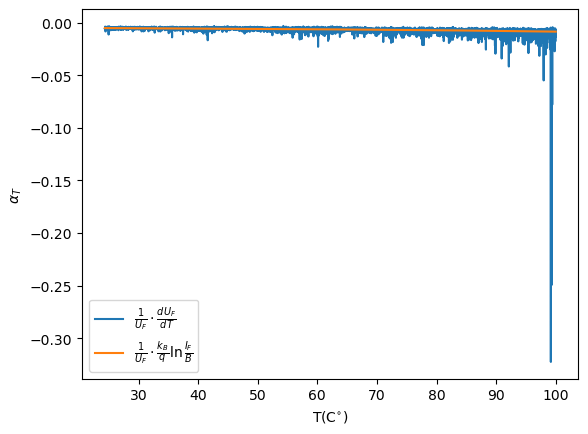

In [42]:
plt.plot(T[:-1], alpha(ch[2], K(T)), label=r'$\frac{1}{U_F}\cdot\frac{dU_F}{dT}$')
plt.plot(T[:-1], 1/ch[2][:-1]*k*np.log(If/res2[0][1]), label=r'$\frac{1}{U_F}\cdot\frac{k_B}{q}\ln\frac{I_F}{B}$')
plt.xlabel(r'T(C$^{\circ}$)')
plt.ylabel(r'$\alpha_T$')
plt.legend()
plt.show()